In [2]:
'''
more description goes here: http://archive.ics.uci.edu/ml/datasets/Poker+Hand
'''

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = range(10)
y = map(lambda i: i**2, x)

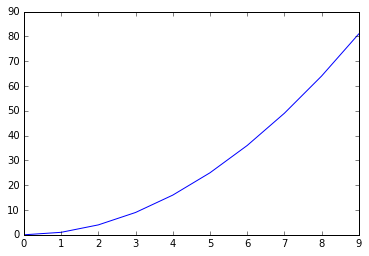

In [4]:
plt.plot(x,y)

In [5]:
data = np.genfromtxt("data/poker-hand/poker-hand-testing.data",delimiter=",")

In [6]:
print(data.shape)
w,h = data.shape

(1000000, 11)


In [7]:
print(data[:5])

[[  1.   1.   1.  13.   2.   4.   2.   3.   1.  12.   0.]
 [  3.  12.   3.   2.   3.  11.   4.   5.   2.   5.   1.]
 [  1.   9.   4.   6.   1.   4.   3.   2.   3.   9.   1.]
 [  1.   4.   3.  13.   2.  13.   2.   1.   3.   6.   1.]
 [  3.  10.   2.   7.   1.   2.   2.  11.   4.   9.   0.]]


In [8]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [12]:
sample_rate = 0.001
data_test = data[:int(w * sample_rate)]
print(data_test.shape)
# print(data_test[:10])
# print([:10])

data_test_sorted = data_test[data_test[:,10].argsort()]

X = data_test[:,:10]
Y = data_test[:,10]
# X = data_test_sorted[:,:10]
# Y = data_test_sorted[:,10]

X_test = X
Y_test = Y

print(X_test.shape)
print(Y_test.shape)

(1000, 11)
(1000, 10)
(1000,)


In [13]:
#OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

svc = LinearSVC(random_state=0)
classifier = OneVsRestClassifier(svc,n_jobs=2).fit(X_test,Y_test)

print(classifier.classes_)

[ 0.  1.  2.  3.  4.  5.]


In [14]:
Y_hat = classifier.predict(X_test)
score = classifier.score(X_test, Y_test)
print(Y_hat[:100])
#print(Y_test)

print(score)

[ 1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.
  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
0.509
